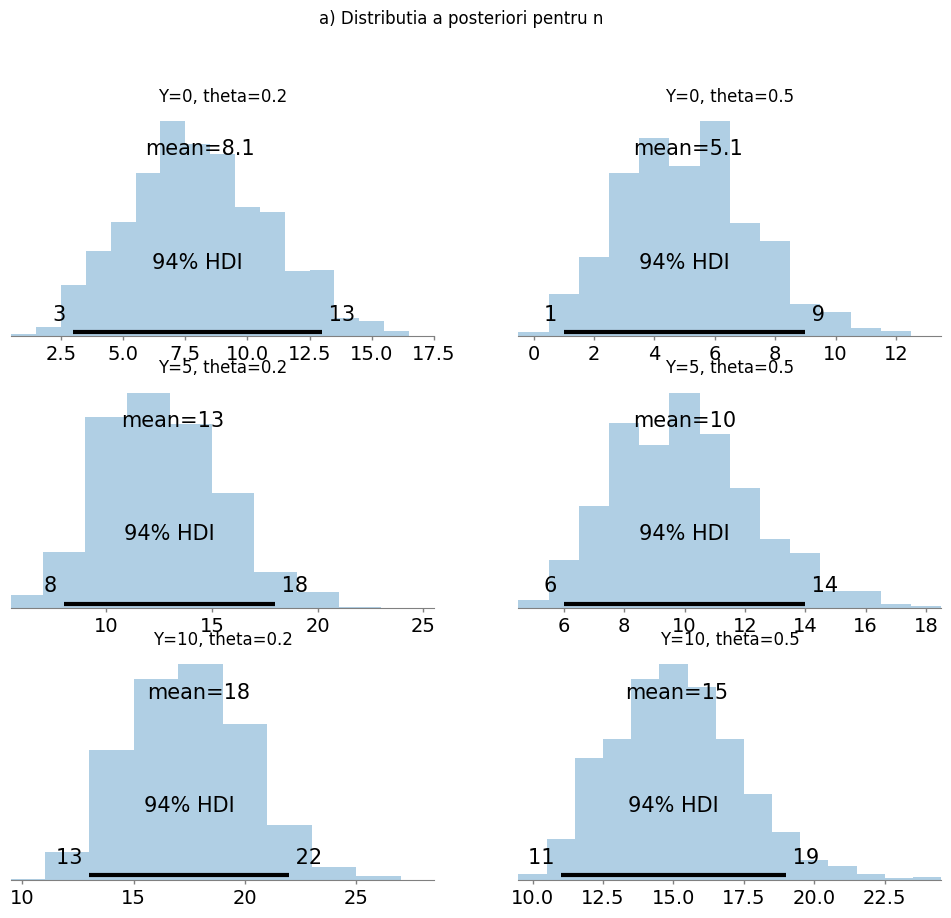

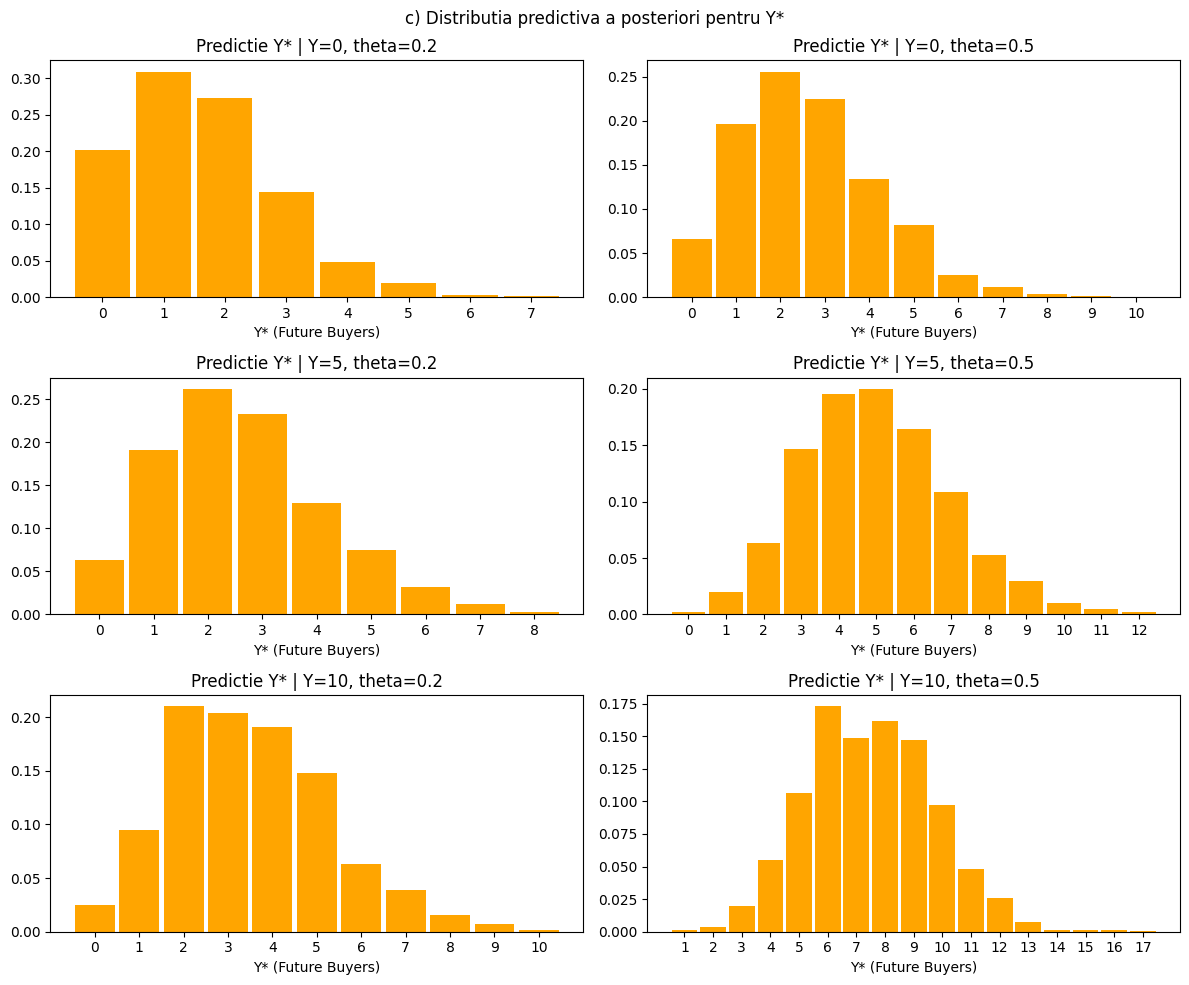

In [10]:
# a si c

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

#a
fig_post, axes_post = plt.subplots(len(y_values), len(theta_values), figsize=(12, 10))
fig_post.suptitle('a) Distributia a posteriori pentru n')

#c
fig_pred, axes_pred = plt.subplots(len(y_values), len(theta_values), figsize=(12, 10))
fig_pred.suptitle('c) Distributia predictiva a posteriori pentru Y*')

for i, y_obs in enumerate(y_values):
    for j, theta in enumerate(theta_values):

        with pm.Model() as model:
            n = pm.Poisson('n', mu=10)
            Y_obs = pm.Binomial('Y_obs', n=n, p=theta, observed=y_obs)

            idata = pm.sample(1000, return_inferencedata=True, progressbar=False)

            pm.sample_posterior_predictive(idata, extend_inferencedata=True, progressbar=False)

        # a
        az.plot_posterior(idata, var_names=['n'], ax=axes_post[i, j])
        axes_post[i, j].set_title(f'Y={y_obs}, theta={theta}')

        # c
        y_star_samples = idata.posterior_predictive['Y_obs']
        az.plot_dist(y_star_samples, ax=axes_pred[i, j], color='orange')
        axes_pred[i, j].set_title(f'Predictie Y* | Y={y_obs}, theta={theta}')
        axes_pred[i, j].set_xlabel('Y* (Future Buyers)')

plt.tight_layout()
plt.show()